In [18]:
#imports all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Air Traffic Data Visuals

In [19]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

Saving air traffic.csv to air traffic (1).csv


In [20]:
air_traffic_data = pd.read_csv('air traffic.csv')
#filters the data to only consisder 2017-2023
air_traffic_data_filtered = air_traffic_data[air_traffic_data['Year'] >= 2017]
#cleans the data to account for columns with missing data
air_traffic_data_cleaned = air_traffic_data_filtered.drop(columns=['Dom_Pax', 'Pax','Dom_RPM','Int_RPM','RPM', 'Dom_ASM','Int_ASM','ASM'])


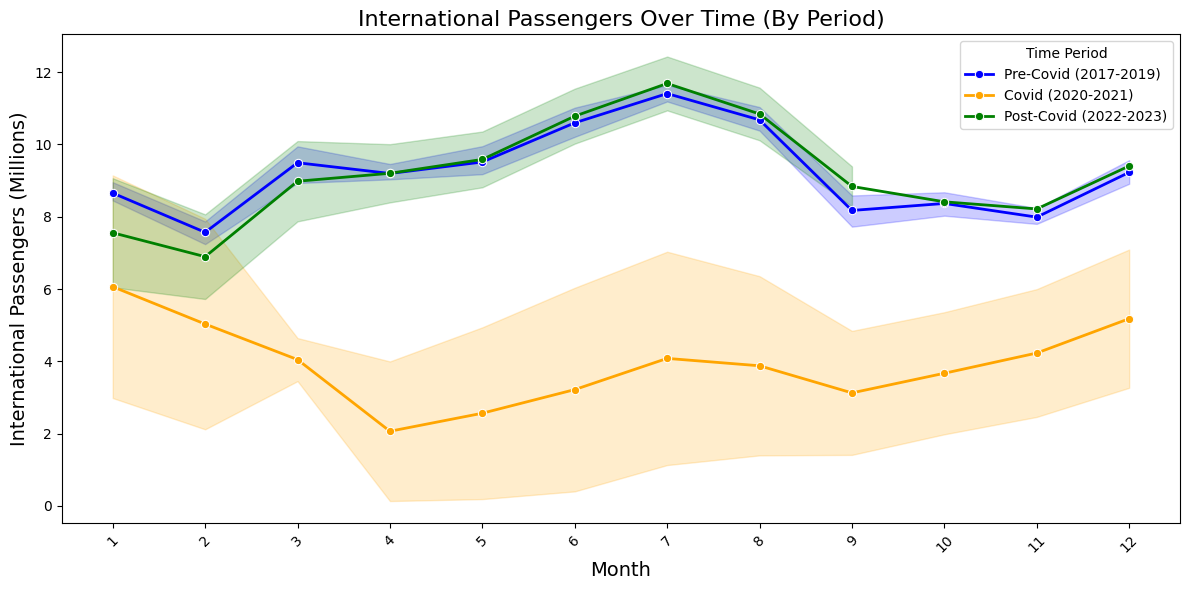

In [41]:
# Filter the data for each period (Pre-Covid, Covid, Post-Covid) and plot them separately
plt.figure(figsize=(12, 6))

# Plot Pre-Covid (2017-2019)
pre_covid = air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2017) & (air_traffic_data_cleaned['Year'] <= 2019)]
sns.lineplot(
    data=pre_covid,
    x='Month',
    y=pre_covid['Int_Pax'].astype(float) / 1_000_000,  # Scale to millions
    marker='o',
    linewidth=2,
    label='Pre-Covid (2017-2019)',
    color='blue'
)

# Plot Covid (2020-2021)
covid = air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2020) & (air_traffic_data_cleaned['Year'] <= 2021)]
sns.lineplot(
    data=covid,
    x='Month',
    y=covid['Int_Pax'].astype(float) / 1_000_000,  # Scale to millions
    marker='o',
    linewidth=2,
    label='Covid (2020-2021)',
    color='orange'
)

# Plot Post-Covid (2022-2023)
post_covid = air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2022) & (air_traffic_data_cleaned['Year'] <= 2023)]
sns.lineplot(
    data=post_covid,
    x='Month',
    y=post_covid['Int_Pax'].astype(float) / 1_000_000,  # Scale to millions
    marker='o',
    linewidth=2,
    label='Post-Covid (2022-2023)',
    color='green'
)

# Titles and labels
plt.title('International Passengers Over Time (By Period)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('International Passengers (Millions)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the legend
plt.legend(title='Time Period')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


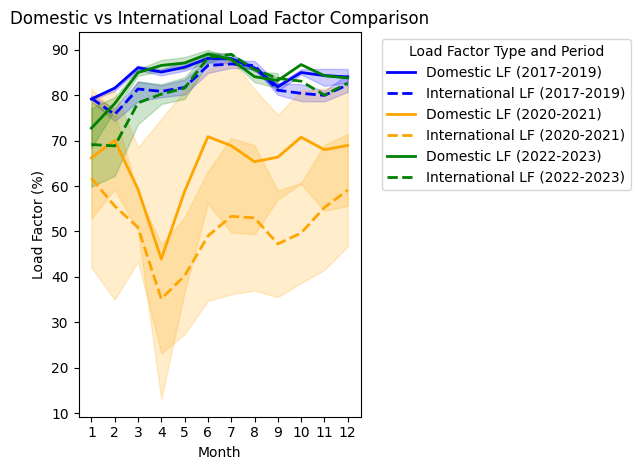

In [26]:
#Domestic vs. International Load Factor (LF)


# Ensure that 'Month' is treated as a categorical variable (1 through 12)
air_traffic_data_cleaned['Month'] = air_traffic_data_cleaned['Month'].astype(str)

# Plot for Pre-Covid (2017-2019) - Domestic and International Load Factor
sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2017) & (air_traffic_data_cleaned['Year'] <= 2019)],
             x='Month', y='Dom_LF', label='Domestic LF (2017-2019)',
             color='blue', linestyle='-', linewidth=2)

sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2017) & (air_traffic_data_cleaned['Year'] <= 2019)],
             x='Month', y='Int_LF', label='International LF (2017-2019)',
             color='blue', linestyle='--', linewidth=2)

# Plot for Covid period (2020-2021) - Domestic and International Load Factor
sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2020) & (air_traffic_data_cleaned['Year'] <= 2021)],
             x='Month', y='Dom_LF', label='Domestic LF (2020-2021)',
             color='orange', linestyle='-', linewidth=2)

sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2020) & (air_traffic_data_cleaned['Year'] <= 2021)],
             x='Month', y='Int_LF', label='International LF (2020-2021)',
             color='orange', linestyle='--', linewidth=2)

# Plot for Post-Covid period (2022-2023) - Domestic and International Load Factor
sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2022) & (air_traffic_data_cleaned['Year'] <= 2023)],
             x='Month', y='Dom_LF', label='Domestic LF (2022-2023)',
             color='green', linestyle='-', linewidth=2)

sns.lineplot(data=air_traffic_data_cleaned[(air_traffic_data_cleaned['Year'] >= 2022) & (air_traffic_data_cleaned['Year'] <= 2023)],
             x='Month', y='Int_LF', label='International LF (2022-2023)',
             color='green', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Load Factor (%)')
plt.title('Domestic vs International Load Factor Comparison')

# Add the legend
plt.legend(title='Load Factor Type and Period', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for legend
plt.tight_layout()

# Show the plot
plt.show()

COVID Data

In [30]:
#For COVID Files
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

Saving biweekly_deaths.csv to biweekly_deaths.csv
Saving biweekly_cases.csv to biweekly_cases.csv


In [31]:
#Begin taking a look at the COVID Data
# Load the biweekly COVID cases and deaths data
cases_df = pd.read_csv('biweekly_cases.csv')
deaths_df = pd.read_csv('biweekly_deaths.csv')

# Check the first few rows
print(cases_df.head())
print(deaths_df.head())

         date  World  Afghanistan  Africa  Albania  Algeria  American Samoa  \
0  2020-01-05    NaN          NaN     NaN      NaN      NaN             NaN   
1  2020-01-06    NaN          NaN     NaN      NaN      NaN             NaN   
2  2020-01-07    NaN          NaN     NaN      NaN      NaN             NaN   
3  2020-01-08    NaN          NaN     NaN      NaN      NaN             NaN   
4  2020-01-09    NaN          NaN     NaN      NaN      NaN             NaN   

   Andorra  Angola  Anguilla  ...  Uruguay  Uzbekistan  Vanuatu  Vatican  \
0      NaN     NaN       NaN  ...      NaN         NaN      NaN      NaN   
1      NaN     NaN       NaN  ...      NaN         NaN      NaN      NaN   
2      NaN     NaN       NaN  ...      NaN         NaN      NaN      NaN   
3      NaN     NaN       NaN  ...      NaN         NaN      NaN      NaN   
4      NaN     NaN       NaN  ...      NaN         NaN      NaN      NaN   

   Venezuela  Vietnam  Wallis and Futuna  Yemen  Zambia  Zimbabwe  


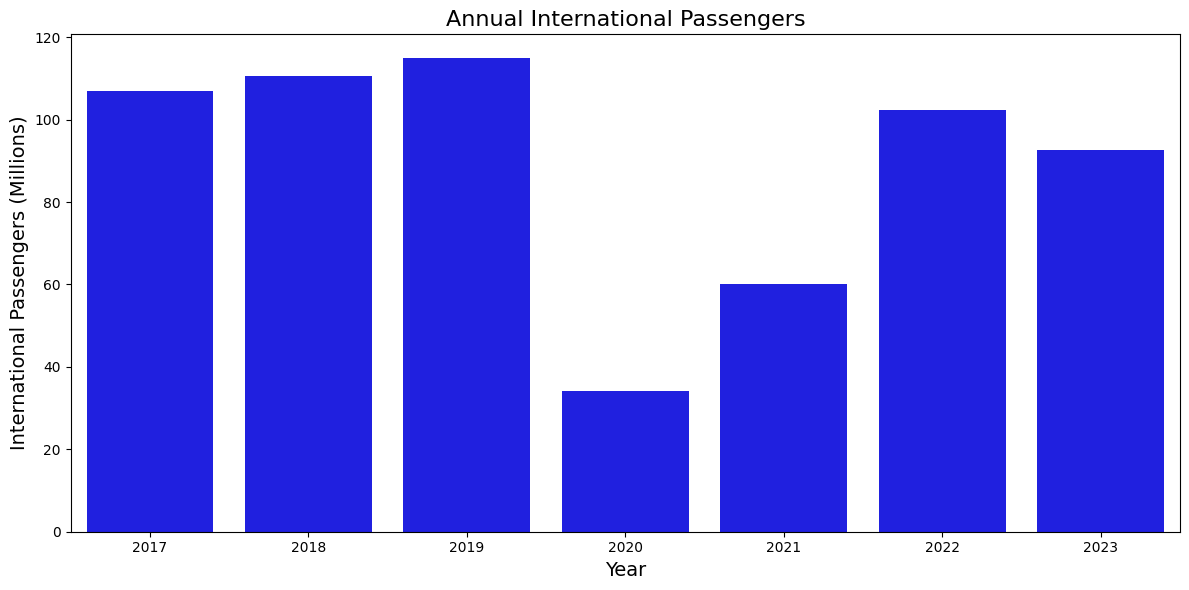

In [42]:
# Ensure the 'Int_Pax' column is numeric and aggregate data by year
air_traffic_data_cleaned['Int_Pax'] = pd.to_numeric(air_traffic_data_cleaned['Int_Pax'], errors='coerce')

# Aggregate passengers by year, converting to millions
annual_passengers = (
    air_traffic_data_cleaned.groupby('Year', as_index=False)['Int_Pax']
    .sum()
    .assign(Int_Pax_Millions=lambda df: df['Int_Pax'] / 1_000_000)
)
plt.figure(figsize=(12, 6))

# Bar plot of international passengers per year
sns.barplot(data=annual_passengers,
            x='Year',
            y='Int_Pax_Millions',
            color='blue')  # You can use a different color if desired

# Titles and labels
plt.title('Annual International Passengers', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('International Passengers (Millions)', fontsize=14)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


Air Traffic Data vs. COVID Data

Pearson correlation coefficient: 0.08407109449122362
R^2 (coefficient of determination): 0.00706794892895225


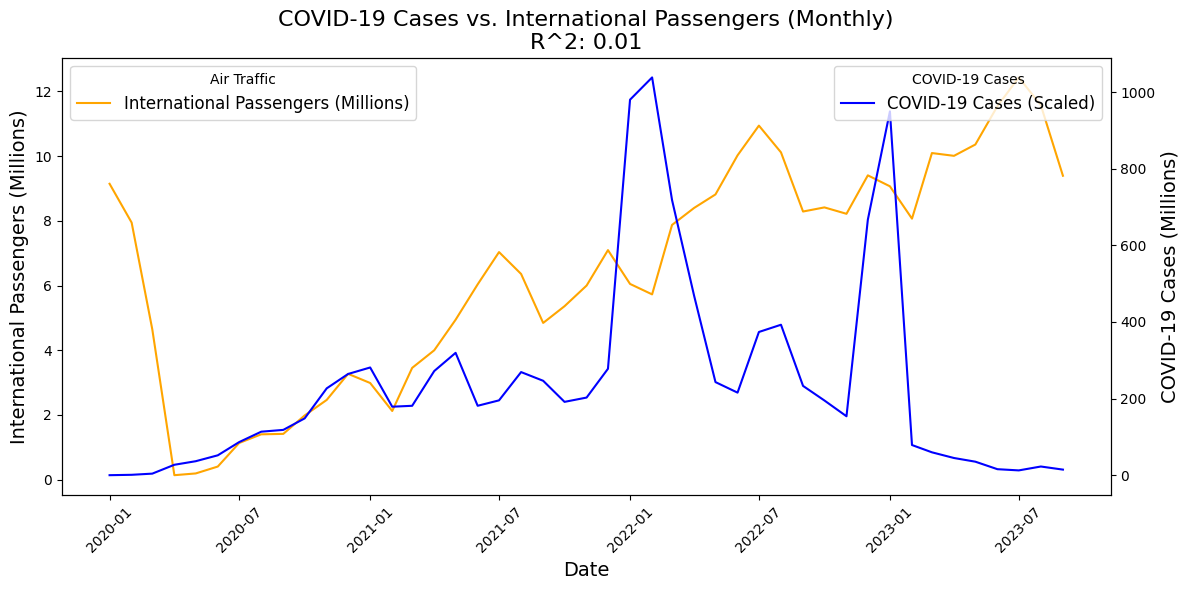

In [35]:
# Extract the relevant columns for correlation (international passengers and scaled covid cases)
y1 = merged_data['Int_Pax_Millions']  # International Passengers (Millions)
y2 = merged_data['World_Scaled']  # Scaled COVID-19 Cases (Millions)

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(y1, y2)

# Calculate R^2 (coefficient of determination)
r_squared = corr_coefficient**2

# Print the correlation coefficient and R^2
print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"R^2 (coefficient of determination): {r_squared}")

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot International Passengers (Air Traffic) on the left y-axis
sns.lineplot(data=merged_data, x='Date', y='Int_Pax_Millions', label='International Passengers (Millions)', color='orange', ax=ax1)
ax1.set_ylabel('International Passengers (Millions)', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for scaled COVID-19 cases
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='Date', y='World_Scaled', label='COVID-19 Cases (Scaled)', color='blue', ax=ax2)
ax2.set_ylabel('COVID-19 Cases (Millions)', fontsize=14)

# Titles and labels
plt.title(f'COVID-19 Cases vs. International Passengers (Monthly)\nR^2: {r_squared:.2f}', fontsize=16)

# Show the legends
ax1.legend(loc='upper left', title='Air Traffic', fontsize=12)
ax2.legend(loc='upper right', title='COVID-19 Cases', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()